In [1]:
import matplotlib.pyplot as plt
import dense_basis as db
import numpy as np
import sys

# print priors
db.print_priors()

# sample from priors: M*, SFR, tx, Av, Z, z

rseed = 9

rand_sfh_tuple = db.sample_sfh_tuple(random_seed = rseed, Nparam = 1)
print(rand_sfh_tuple)

rand_sfh, rand_time = db.gp_sfh_sklearn(rand_sfh_tuple, zval = 0.1)

fig = db.plot_sfh(rand_time, rand_sfh, lookback=True)
plt.show()

Initialized stellar population with FSPS.
The prior on log mass is uniform from 9.0 to 12.0
The prior on log SFR_inst is uniform from -1.0 to 2.0
The prior on redshift is uniform from 0.9 to 1.1
The prior on log metallicity/Zsolar is uniform from -1.5 to 0.5
The prior on dust (model: Calzetti) is uniform from 0.0 to 1.0
[9.03112246 0.50562378 1.         0.36330966]


<Figure size 1200x400 with 1 Axes>

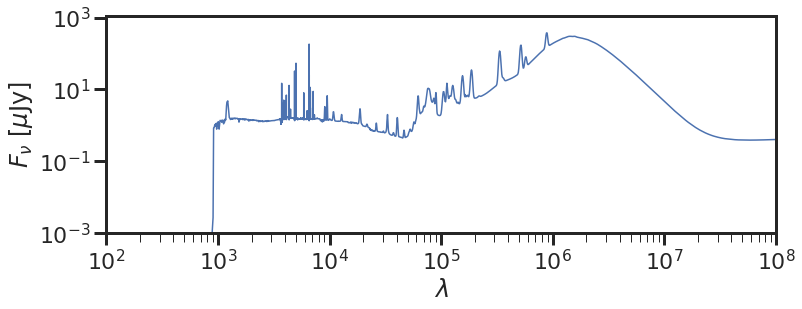

In [2]:
rand_sfh_tuple, rand_Z, rand_Av, rand_z = db.sample_all_params(random_seed = rseed, Nparam = 1)
rand_spec, rand_lam = db.make_spec(rand_sfh_tuple, rand_Z, rand_Av, rand_z, return_lam = True)

filter_list = 'dense_basis/filters/filter_list_goodss.dat'
rand_sed = db.calc_fnu_sed(rand_spec, rand_z, rand_lam, fkit_name = filter_list)

db.plot_spec(rand_lam, rand_spec)
plt.show()

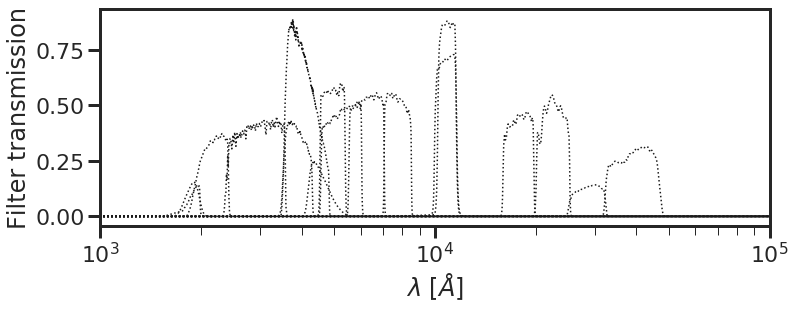

In [3]:
# visualize filter curves

centers_goods_s = np.array([3734,3722,4317,5918,7693,8047,9055,9851,10550,12486,15370,21605,21463,35508,44960,57245,78840])

filter_list = 'dense_basis/filters/filter_list_goodss.dat'
filcurves, lam_z, lam_z_lores = db.make_filvalkit_simple(rand_lam, rand_z, fkit_name = filter_list, )

plt.figure(figsize=(12,4))
plt.plot(rand_lam, filcurves,'k:');
plt.xscale('log'); plt.xlim(1e3,1e5)
plt.xlabel(r'$\lambda$ [$\AA$]');plt.ylabel('Filter transmission')
plt.show()

In [3]:
# generate pregrid and return values

rand_sfh_tuples, rand_Zs, rand_Avs, rand_zs, rand_seds, norm_method = db.generate_pregrid(filter_list=filter_list)

100%|██████████| 10/10 [02:56<00:00,  5.24s/it]


In [3]:
# generate pregrid and store values

db.generate_pregrid(N_pregrid = 10000, store = True, filter_list=filter_list, norm_method = 'max')

100%|██████████| 10000/10000 [57:39<00:00,  2.60it/s] 


In [ ]:
# generate pregrid and store values - on the new machine

for npar in range(5):
    db.generate_pregrid(N_pregrid = 10000, Nparam = npar, store = True, 
                        filter_list=filter_list, norm_method = 'max')

 27%|██▋       | 2719/10000 [05:23<08:47, 13.81it/s] 

In [6]:
# check stored output

import scipy.io as sio
sio.whosmat('dense_basis/pregrids/sfh_pregrid_size_10000.mat')

[('rand_sfh_tuples', (4, 10000), 'double'),
 ('rand_Z', (1, 10000), 'double'),
 ('rand_Av', (1, 10000), 'double'),
 ('rand_z', (1, 10000), 'double'),
 ('rand_seds', (17, 10000), 'double'),
 ('norm_method', (1,), 'char')]

In [4]:
# check stored output

import scipy.io as sio
sio.whosmat('dense_basis/pregrids/sfh_pregrid_size_1000.mat')

[('rand_sfh_tuples', (6, 1000), 'double'),
 ('rand_Z', (1, 1000), 'double'),
 ('rand_Av', (1, 1000), 'double'),
 ('rand_z', (1, 1000), 'double'),
 ('rand_seds', (17, 1000), 'double'),
 ('norm_method', (1,), 'char'),
 ('rand_norm_facs', (1, 1000), 'double')]

In [4]:
Nparam = 7

for i in range(100):

    rand_sfh_tuple, rand_Z, rand_Av, rand_z = db.sample_all_params_safesSFR(random_seed = i, Nparam = Nparam)
    
    # check to see if sfr is the problem - seems to be. - sSFR < 8.18 or so craps out with Nparam = 1
    rand_sfh_tuple[1] = rand_sfh_tuple[0]-8.2
    
    #print(rand_sfh_tuple)
    sfh, timeax = db.gp_sfh_george(rand_sfh_tuple, zval = rand_z)